<a href="https://colab.research.google.com/github/shrutivarade/cs666student/blob/main/Copy_of_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

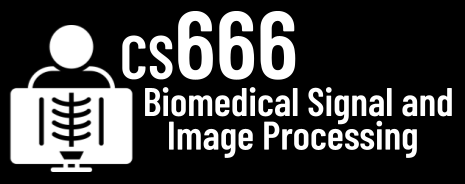
#Assignment 5

In [ ]:
# NAME: Shruti Varade

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [167]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [168]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: YOUR_ANSWER: 220

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

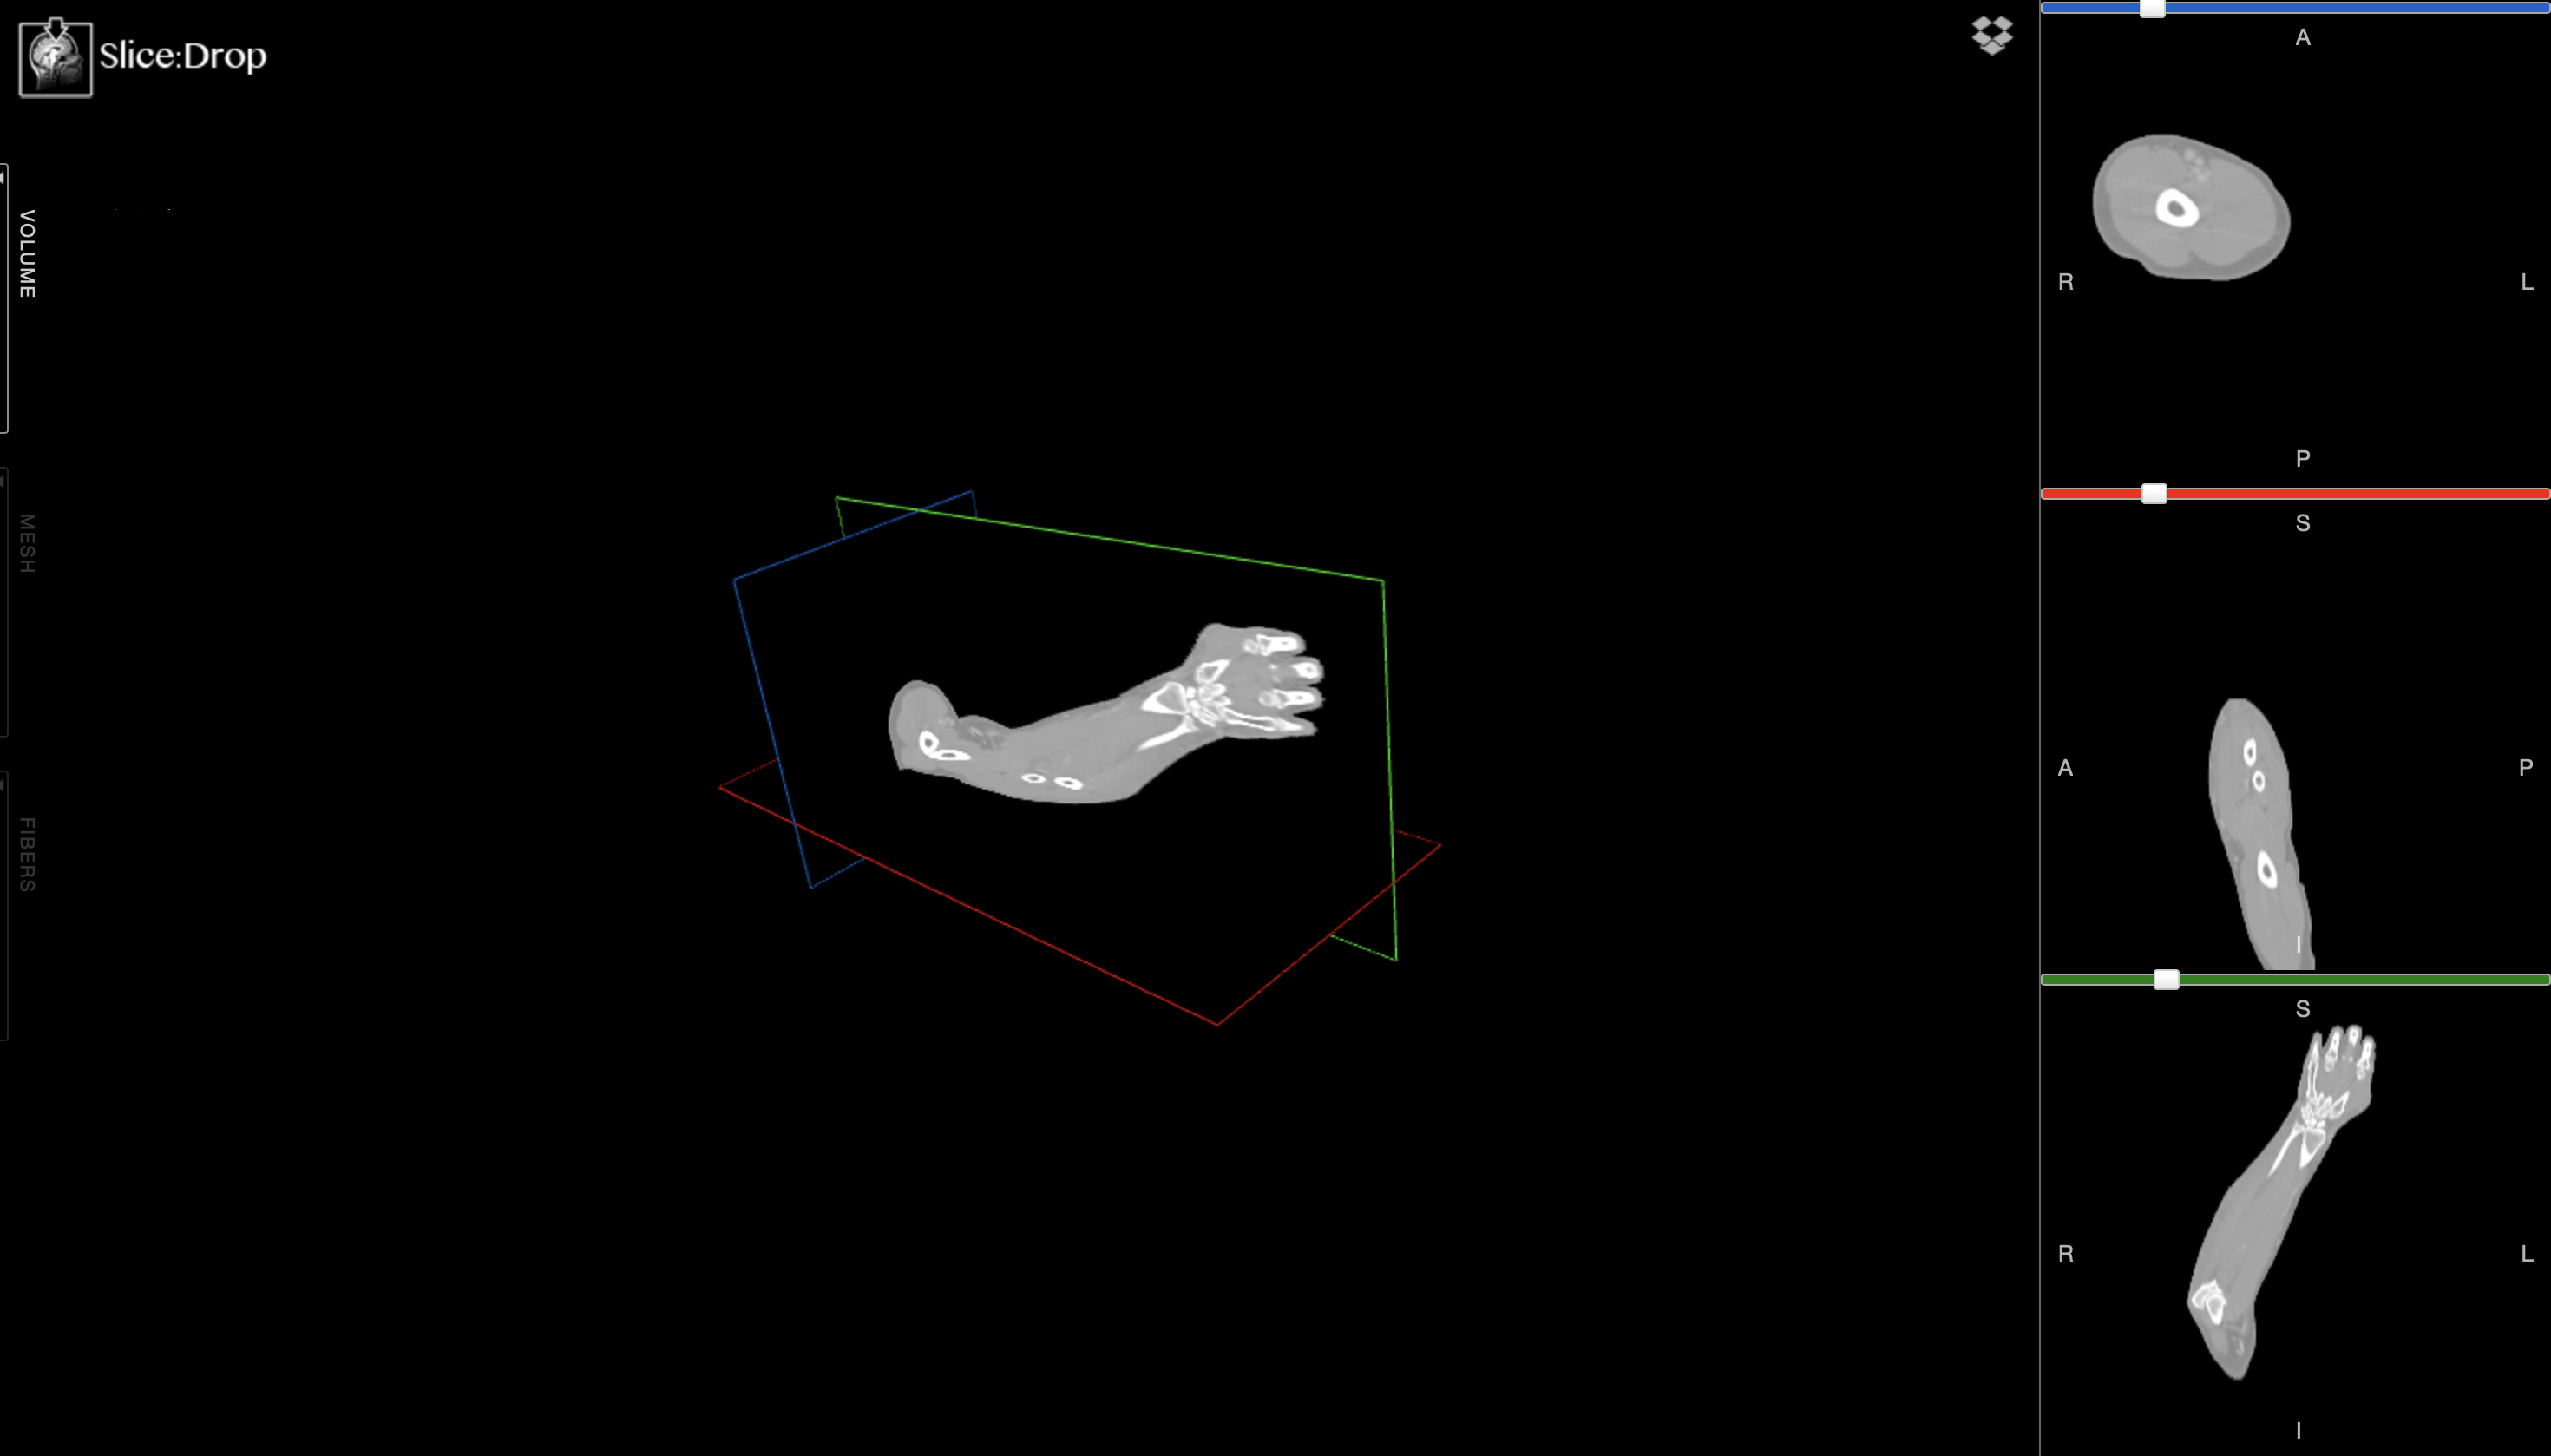

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

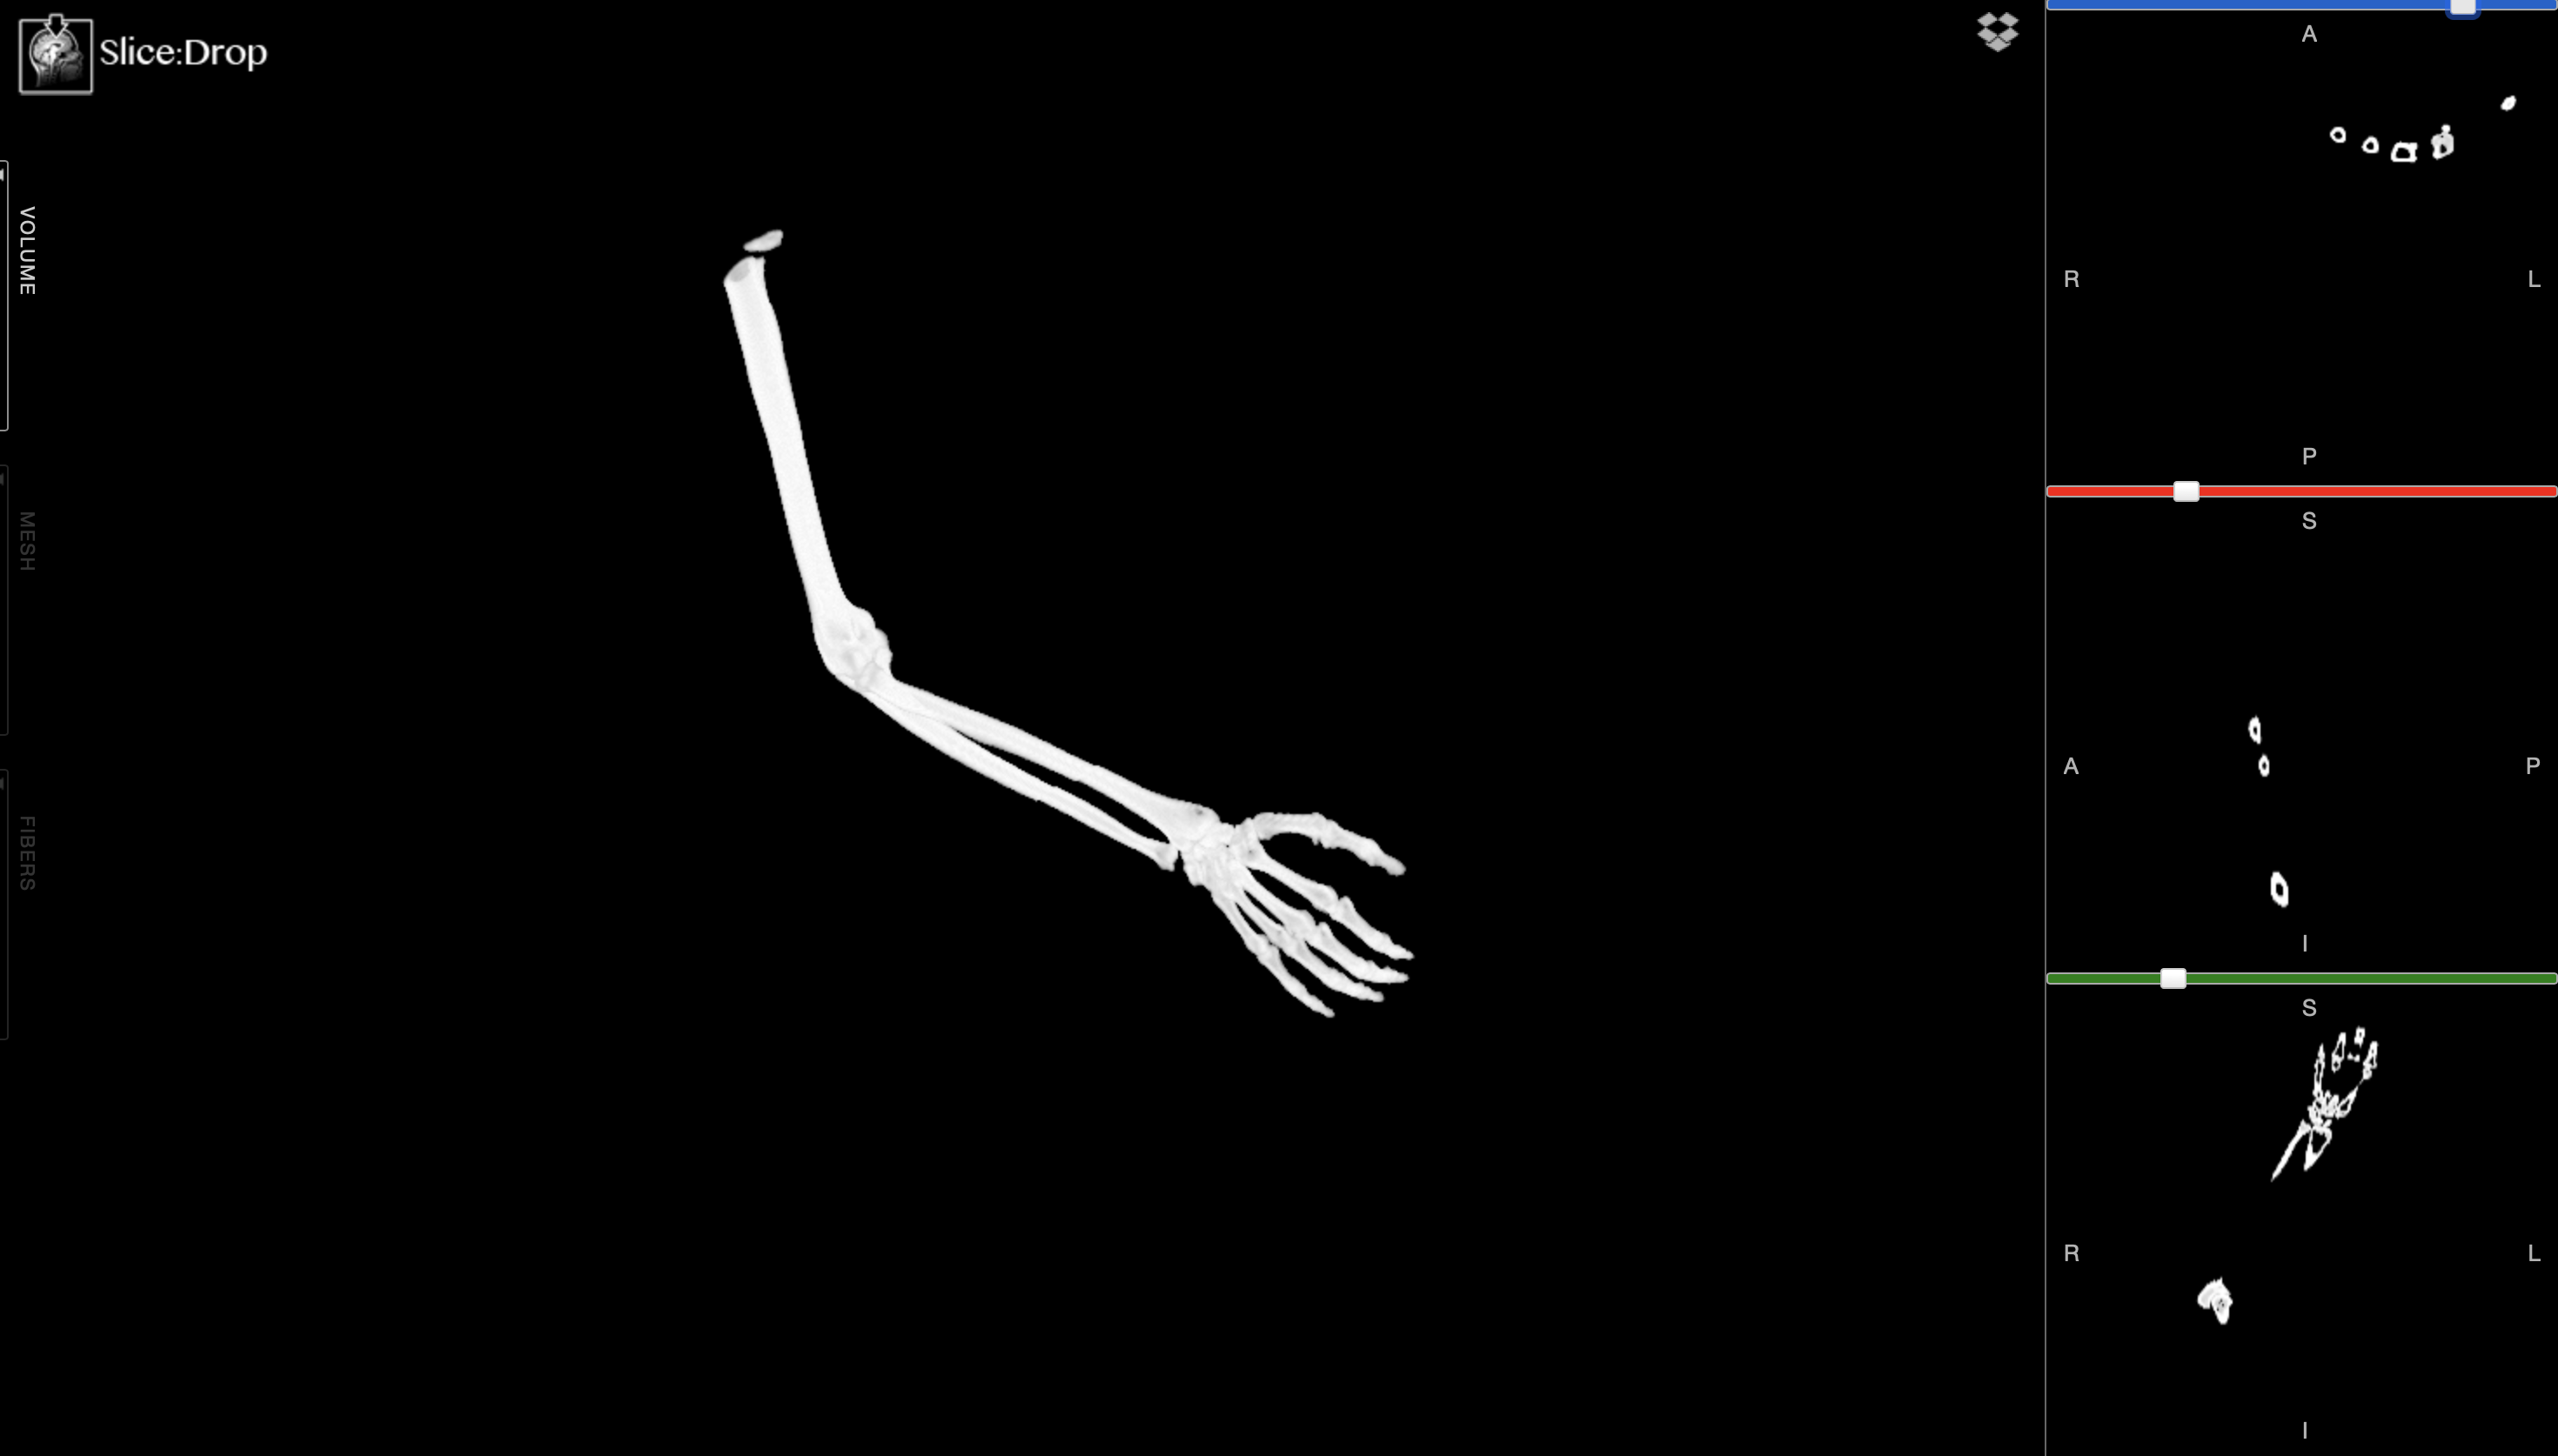

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [169]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [170]:
from pydicom import dcmread
import matplotlib.pyplot as plt

In [171]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os


DIR = "/content/ct"

filenames = os.listdir(DIR)
filenames.sort()
# filenames[0]

size = len(filenames)
# print(len(filenames))


img = dcmread(DIR+"/"+filenames[0])
# print(img.Rows)
row = img.Rows
# print(img.Columns)
col = img.Columns

numpy_arr = np.zeros((size, row, col), dtype=np.int32)
# print(numpy_arr.shape)


for i in range(0, size):
    dicom_file = dcmread(DIR+"/"+filenames[i]);
    # print(dicom_file)
    hu_pixels = dicom_file.pixel_array #Hounsfield units (HU) pixel array
    # print(hu_pixels.shape)
    numpy_arr[i] = np.stack(hu_pixels, axis=0) #to create 3D numpy array

# print(numpy_arr)


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

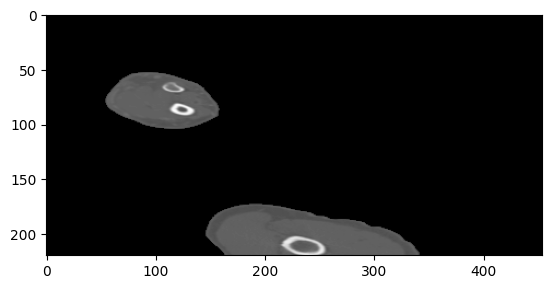

In [172]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(numpy_arr[:,:,250], cmap='gray')
plt.show()

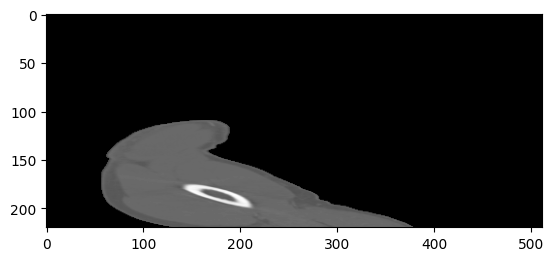

In [173]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(numpy_arr[:,200,:], cmap='gray')
plt.show()

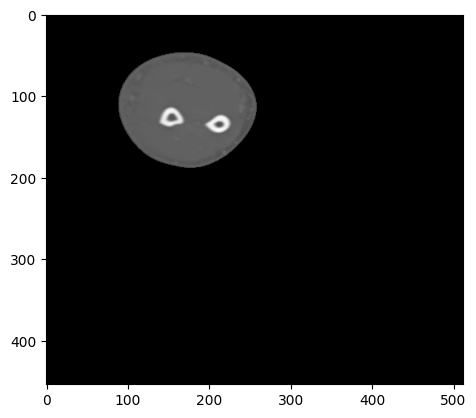

In [174]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(numpy_arr[100,:,:], cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window:  410
Level:  30
vmin:  -175.0
vmax:  235.0
Rescale:  -1024


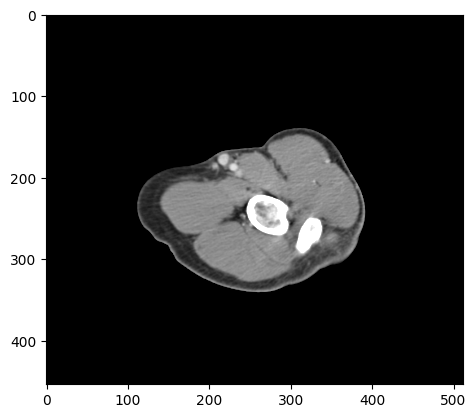

In [175]:
# TODO: YOUR CODE
# visualizing last slice with window/level adjustment.
# dicom_file

window = dicom_file.WindowWidth
print("Window: ",window)
level = dicom_file.WindowCenter
print("Level: ",level)
vmin = level - (window/2)
print("vmin: ", vmin)
vmax = level + (window/2)
print("vmax: ", vmax)
rescale = dicom_file.RescaleIntercept
print("Rescale: ", rescale)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

vmin:  210
vmax:  233
Rescale:  -1024


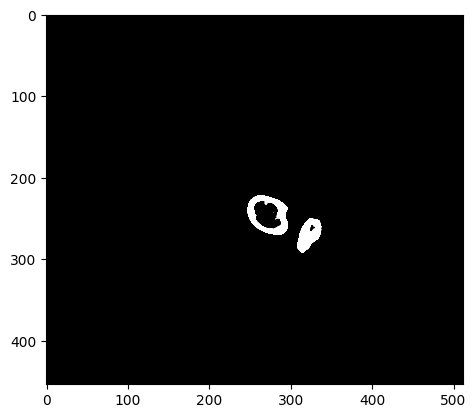

In [176]:
# TODO: YOUR CODE
vmin = 210
print("vmin: ", vmin)
vmax = 233
print("vmax: ", vmax)
rescale = dicom_file.RescaleIntercept
print("Rescale: ", rescale)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

The values of vmin=210 and vmax=233 is better than vmin=-175 and vmax=235 as the higher value of hounsefield unit takes us toward the white scale that display bones in the image above. All the other tissues and fats have dark color scale that is having low hounsfield unit value.


**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

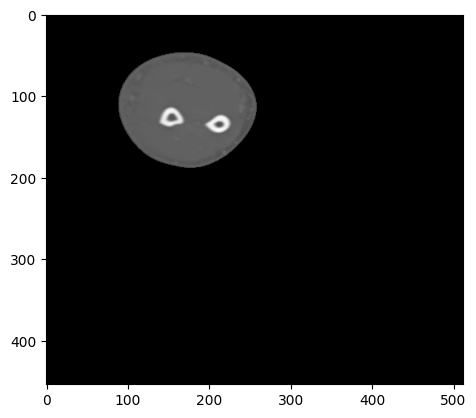

In [181]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_mask = numpy_arr.copy()
fat_mask[(fat_mask >= -70) & (fat_mask < -30)] = 0
fat_mask = fat_mask.astype(np.int16)

plt.imshow(numpy_arr[:,:,250], cmap='gray')
plt.imshow(fat_mask[:,:,250], alpha=1, cmap='gray')
plt.imshow(numpy_arr[:,200,:], cmap='gray')
plt.imshow(fat_mask[:,200,:], alpha=1, cmap='gray')
plt.imshow(numpy_arr[100,:,:], cmap='gray')
plt.imshow(fat_mask[100,:,:], alpha=1, cmap='gray')

plt.show()

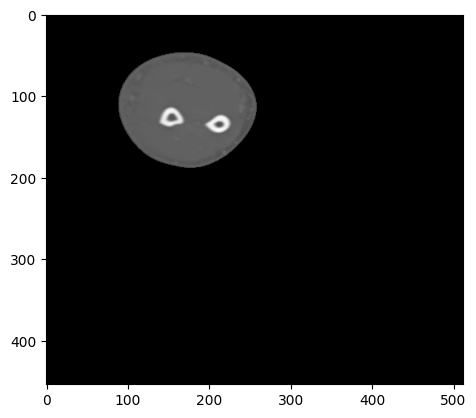

In [178]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft_tissue_mask = numpy_arr.copy()
soft_tissue_mask[(soft_tissue_mask >= 20) & (soft_tissue_mask < 40)] = 0
soft_tissue_mask = soft_tissue_mask.astype(np.int16)

plt.imshow(numpy_arr[:,:,250], cmap='gray')
plt.imshow(soft_tissue_mask[:,:,250], alpha=1, cmap='gray')
plt.imshow(numpy_arr[:,200,:], cmap='gray')
plt.imshow(soft_tissue_mask[:,200,:], alpha=1, cmap='gray')
plt.imshow(numpy_arr[100,:,:], cmap='gray')
plt.imshow(soft_tissue_mask[100,:,:], alpha=1, cmap='gray')

plt.show()

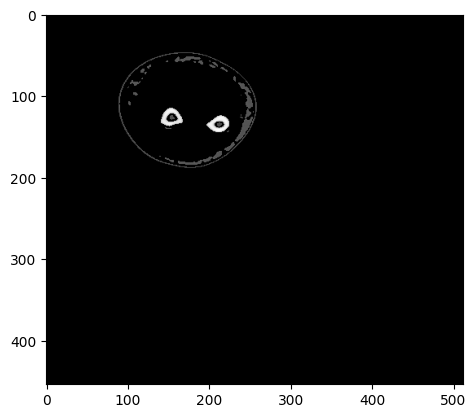

In [180]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_mask = numpy_arr.copy()
bone_mask[(bone_mask >= 1000) & (bone_mask < 2000)] = 0
bone_mask = bone_mask.astype(np.int16)

plt.imshow(numpy_arr[:,:,250], cmap='gray')
plt.imshow(bone_mask[:,:,250], alpha=1, cmap='gray')
plt.imshow(numpy_arr[:,200,:], cmap='gray')
plt.imshow(bone_mask[:,200,:], alpha=1, cmap='gray')
plt.imshow(numpy_arr[100,:,:], cmap='gray')
plt.imshow(bone_mask[100,:,:], alpha=1, cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER
# yes

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""